## Section 0: Importing Necessary Packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# reading in necessary csv files
games_details = pd.read_csv('data/games_details.csv')
games = pd.read_csv("data/games.csv",parse_dates=["GAME_DATE_EST"],infer_datetime_format=True)
# parsing our dates and putting them into datetime format
games = games.drop_duplicates().sort_values("GAME_DATE_EST").set_index(["GAME_DATE_EST"])
# dropping any duplicate dates, and sorting values so that earliest date comes first. setting the date as our index
ranking = pd.read_csv("data/ranking.csv",parse_dates=["STANDINGSDATE"])
ranking.sort_values("STANDINGSDATE", inplace=True)
players = pd.read_csv('data/players.csv')
teams = pd.read_csv('data/teams.csv')
pd.options.display.max_columns = 50
# making it so that we can see up to 50 columns every time we look at our data

## Section 1: Exploratory Analysis

### Understanding Each Dataset

In [132]:
games_details.head(2)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,12000047,1610612766,CHA,Charlotte,1628998,Cody Martin,F,NaN,17:06,0.0,2.0,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,-31.0
1,12000047,1610612766,CHA,Charlotte,1629023,P.J. Washington,F,NaN,24:58,4.0,17.0,0.235,0.0,3.0,0.0,1.0,2.0,0.5,1.0,6.0,7.0,2.0,2.0,1.0,5.0,3.0,9.0,-2.0


In [133]:
games.head(2)

,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,0.143,23.0,41.0,1610612742,85.0,0.447,0.5,0.250,20.0,38.0,1
2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,0.267,25.0,48.0,1610612749,94.0,0.427,0.7,0.154,20.0,43.0,1


In [134]:
players.head(2)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019


In [135]:
ranking.head(2)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
159591,1610612752,0,22002,2003-10-01,East,New York,82,37,45,0.451,24-17,13-28,NaN
159583,1610612765,0,22002,2003-10-01,East,Detroit,82,50,32,0.610,30-11,20-21,NaN


In [136]:
teams.head(2)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws


In [137]:
games.columns = [x.lower() for x in games.columns]
teams.columns = [x.lower() for x in teams.columns]
ranking.columns = [x.lower() for x in ranking.columns]
players.columns = [x.lower() for x in players.columns]

In [138]:
corr_matrix = games.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

print(sol)
corr_matrix

home_team_id     team_id_home    1.000000
visitor_team_id  team_id_away    1.000000
pts_away         fg_pct_away     0.668344
pts_home         fg_pct_home     0.663106
                 ast_home        0.592857
                                   ...   
visitor_team_id  season          0.002648
game_id          fg_pct_away     0.001855
home_team_id     season          0.001295
season           team_id_home    0.001295
fg3_pct_home     fg3_pct_away    0.000884
Length: 171, dtype: float64


,game_id,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,team_id_away,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins
game_id,1.000000,0.026462,0.032588,0.085846,0.026462,0.024514,0.016698,0.033897,0.004990,0.037499,0.008273,0.032588,0.007666,0.001855,0.031238,0.005855,0.047710,0.027572,0.034022
home_team_id,0.026462,1.000000,0.046723,0.001295,1.000000,0.025925,0.002933,0.005436,0.006255,0.103919,0.032364,0.046723,0.012620,0.024044,0.020054,0.015537,0.078197,0.039335,0.019983
visitor_team_id,0.032588,0.046723,1.000000,0.002648,0.046723,0.007574,0.034006,0.006829,0.017595,0.015561,0.013453,1.000000,0.039336,0.024353,0.017947,0.024362,0.014975,0.011753,0.032007
season,0.085846,0.001295,0.002648,1.000000,0.001295,0.302180,0.032380,0.050539,0.023046,0.158363,0.152559,0.002648,0.328095,0.054972,0.049815,0.014923,0.210837,0.181082,0.020254
team_id_home,0.026462,1.000000,0.046723,0.001295,1.000000,0.025925,0.002933,0.005436,0.006255,0.103919,0.032364,0.046723,0.012620,0.024044,0.020054,0.015537,0.078197,0.039335,0.019983
pts_home,0.024514,0.025925,0.007574,0.302180,0.025925,1.000000,0.663106,0.178347,0.420438,0.592857,0.154447,0.007574,0.476255,0.126357,0.065321,0.057859,0.189976,0.144450,0.404869
fg_pct_home,0.016698,0.002933,0.034006,0.032380,0.002933,0.663106,1.000000,0.015261,0.442565,0.548532,0.195904,0.034006,0.114597,0.041699,0.031578,0.017017,0.008770,0.462314,0.430832
ft_pct_home,0.033897,0.005436,0.006829,0.050539,0.005436,0.178347,0.015261,1.000000,0.025752,0.012855,0.056006,0.006829,0.071700,0.047187,0.035892,0.021345,0.026383,0.115626,0.090805
fg3_pct_home,0.004990,0.006255,0.017595,0.023046,0.006255,0.420438,0.442565,0.025752,1.000000,0.347645,0.090756,0.017595,0.047844,0.009853,0.017592,0.000884,0.003086,0.195656,0.296387
ast_home,0.037499,0.103919,0.015561,0.158363,0.103919,0.592857,0.548532,0.012855,0.347645,1.000000,0.059329,0.015561,0.168774,0.002764,0.023216,0.009111,0.130335,0.112131,0.308160


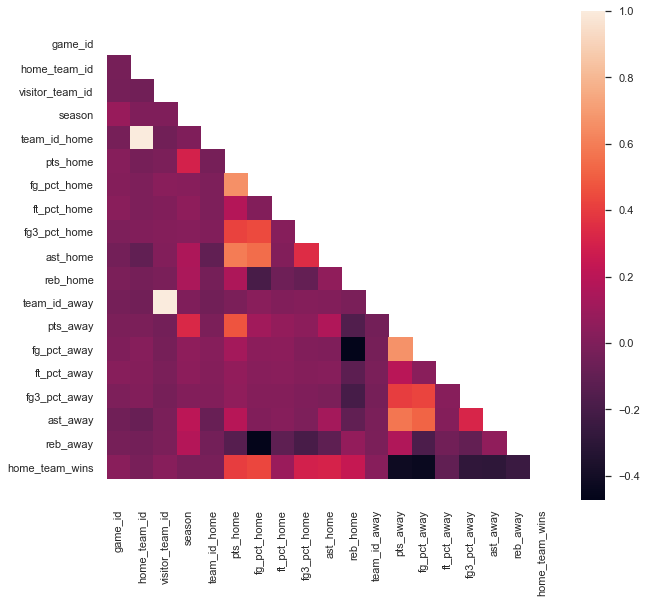

In [139]:
plt.style.use('seaborn')
sns.set(style="white") 
f, ax = plt.subplots(figsize=(10, 9))
mask = np.zeros_like(games.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(games.corr(), mask=mask, square=True)
b, t = plt.ylim() 
b += .75
t -= .75 
plt.ylim(b, t) 
plt.show()

In [140]:
print('Home Team Average Points: ', games.pts_home.mean())
print('Away Team Average Points: ', games.pts_away.mean())

Home Team Average Points:  102.28342086161992
Away Team Average Points:  99.33657828444558


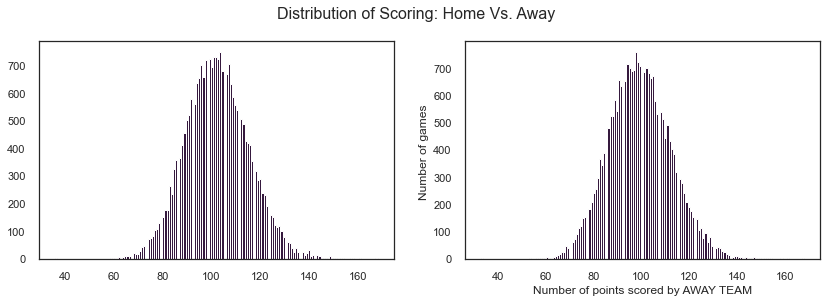

mean: 102.28342086161992 std: 12.949816023318826
mean: 99.33657828444558 std: 13.018652892876455


In [141]:
sns.set_palette("rocket")

fig, axes = plt.subplots(1, 2, figsize = (14,4))

axes[0].hist(games["pts_home"],bins = int(np.sqrt(len(games["pts_home"]))))
plt.xlabel("Number of points scored by HOME TEAM")
plt.ylabel("Number of games ")
mean_ptsh = np.mean(games["pts_home"])
std_ptsh=np.std(games["pts_home"])

axes[1].hist(games["pts_away"],bins = int(np.sqrt(len(games["pts_away"]))))
plt.xlabel("Number of points scored by AWAY TEAM")
plt.ylabel("Number of games ")
mean_ptsa = np.mean(games["pts_away"])
std_ptsa=np.std(games["pts_away"])
plt.suptitle("Distribution of Scoring: Home Vs. Away", size=16, y=1)
plt.show()
print ("mean:",mean_ptsh,"std:",std_ptsh)
print ("mean:",mean_ptsa,"std:",std_ptsa)

In [142]:
games.home_team_wins.value_counts()

1    13901
0     9619
Name: home_team_wins, dtype: int64

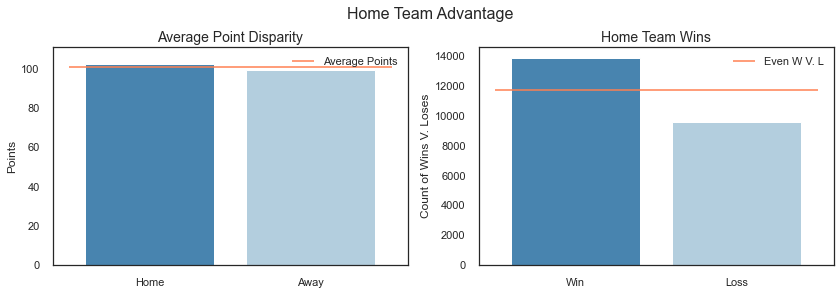

In [143]:
# show that home teams score more on average than away teams
home_team = games.pts_home.mean()
away_team = games.pts_away.mean()
home_team_wins = games[games['home_team_wins'] == 1].value_counts().sum()
away_team_wins = games[games['home_team_wins'] == 0].value_counts().sum()
points = (home_team+away_team)/2

#prepare plot labels
label_team= ["Home", "Away"]
values_team = [home_team, away_team]
label_wins = ["Home", "Away"]
values_wins = [home_team_wins, away_team_wins]

#--------------------------Bar Plots--------------------------------------#
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.barplot(ax = ax[0], x=label_team, y=values_team, palette="Blues_r")
sns.barplot(ax = ax[1], x=games.home_team_wins.value_counts().index, y=games.home_team_wins.value_counts(), order = [1,0], palette="Blues_r")
ax[0].hlines(points, -.5 ,1.5, colors="coral", label="Average Points") #plot average price horizontal line
ax[1].hlines(len(games)/2, -.5 ,1.5, colors="coral", label="Even W V. L") #plot average price horizontal line

#prettify graphs
ax[0].set_ylabel("Points", size=12)
ax[0].set_title("Average Point Disparity", size=14)
ax[0].set_ylim(0,1.1*points)
ax[0].legend()

ax[1].set_ylabel("Count of Wins V. Loses", size=12)
ax[1].set_title("Home Team Wins", size=14)
ax[1].set_xticklabels(['Win', 'Loss'])
# ax[1].set_ylim(0,1.1*)
ax[1].legend()

plt.suptitle("Home Team Advantage", size=16, y=1.02)
plt.show()

/Users/christadawson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


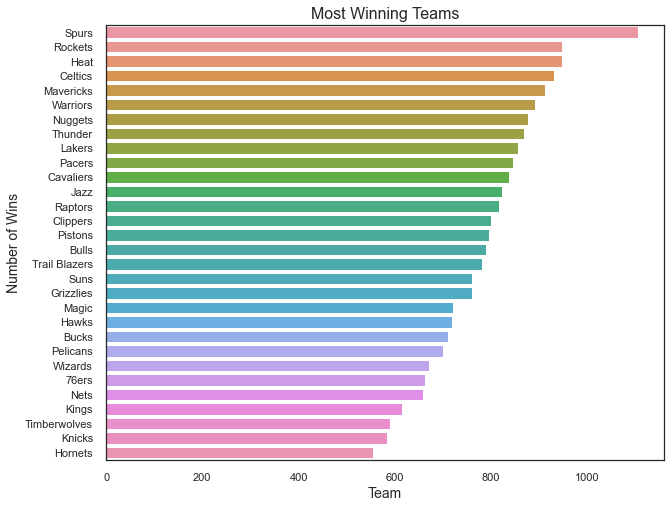

In [144]:
winning_teams = np.where(games['home_team_wins'] == 1, games['home_team_id'], games['visitor_team_id'])
winning_teams = pd.DataFrame(winning_teams, columns=['team_id'])
winning_teams = winning_teams.merge(teams[['team_id', 'nickname']], on='team_id')['nickname'].value_counts().to_frame().reset_index()
winning_teams.columns = ['team_name', 'number_of_wins']

fig, ax = plt.subplots(figsize=(10,8)) 
sns.barplot(winning_teams['number_of_wins'], winning_teams['team_name'])

ax.set_title("Most Winning Teams", size=16)
ax.set_xlabel("Team", size=14)
ax.set_ylabel("Number of Wins", size=14)

plt.show()

In [145]:
winning_teams

,team_name,number_of_wins
0,Spurs,1104
1,Rockets,947
2,Heat,947
3,Celtics,930
4,Mavericks,912
5,Warriors,892
6,Nuggets,876
7,Thunder,868
8,Lakers,855
9,Pacers,845


In [146]:
# correlation between points at home and points away
games.pts_home.corr(games.pts_away)

0.47625505163880805

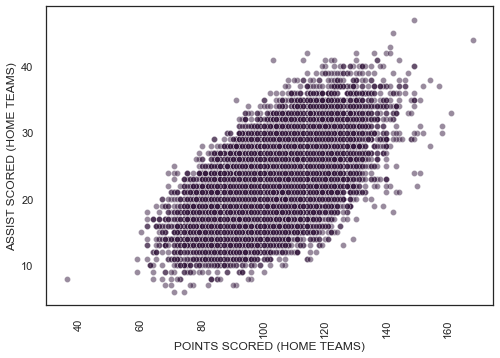

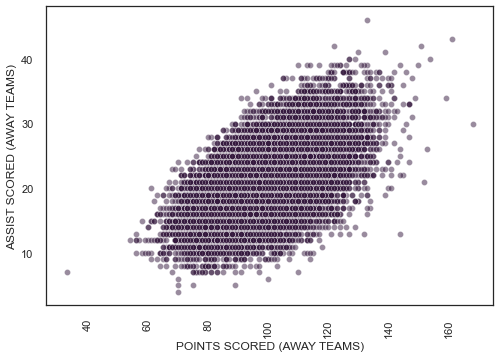

In [147]:
sns.scatterplot(x="pts_home",y="ast_home",data=games,alpha=0.5)

plt.xlabel("POINTS SCORED (HOME TEAMS)")
plt.xticks(rotation = 90)
plt.ylabel("ASSIST SCORED (HOME TEAMS)")

plt.show()

sns.scatterplot(x="pts_away",y="ast_away",data=games,alpha=0.5)

plt.xlabel("POINTS SCORED (AWAY TEAMS)")
plt.xticks(rotation = 90)
plt.ylabel("ASSIST SCORED (AWAY TEAMS)")
plt.title

plt.show()

## Section 2: Data Cleaning

In [148]:
ranking.head()

,team_id,league_id,season_id,standingsdate,conference,team,g,w,l,w_pct,home_record,road_record,returntoplay
159591,1610612752,0,22002,2003-10-01,East,New York,82,37,45,0.451,24-17,13-28,NaN
159583,1610612765,0,22002,2003-10-01,East,Detroit,82,50,32,0.610,30-11,20-21,NaN
159584,1610612751,0,22002,2003-10-01,East,New Jersey,82,49,33,0.598,33-8,16-25,NaN
159585,1610612754,0,22002,2003-10-01,East,Indiana,82,48,34,0.585,32-9,16-25,NaN
159586,1610612755,0,22002,2003-10-01,East,Philadelphia,82,48,34,0.585,25-16,23-18,NaN


In [149]:
games.head()

,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,team_id_away,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,0.143,23.0,41.0,1610612742,85.0,0.447,0.500,0.250,20.0,38.0,1
2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,0.267,25.0,48.0,1610612749,94.0,0.427,0.700,0.154,20.0,43.0,1
2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,0.444,19.0,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1
2003-10-07,10300005,Final,1610612757,1610612745,2003,1610612757,104.0,0.527,0.657,0.429,22.0,33.0,1610612745,80.0,0.470,0.667,0.333,10.0,37.0,1
2003-10-07,10300007,Final,1610612748,1610612755,2003,1610612748,86.0,0.352,0.647,0.222,15.0,55.0,1610612755,79.0,0.329,0.897,0.143,7.0,44.0,1


In [150]:
# setting our index to standings datee
ranking.set_index("standingsdate",inplace=True)
# merging our data so that we merge team_id onto home_team_id
games = pd.merge_asof(games, ranking.add_suffix("_hometeam"), left_index=True, right_index=True, left_by="home_team_id", right_by='team_id'+"_hometeam", allow_exact_matches=False)
# suffixes="_homeTeam",  ## for some reason this gives error, so we workaround it by adding suffixes
games = pd.merge_asof(games, ranking.add_suffix("_awayteam"),left_index=True, right_index=True, left_by="visitor_team_id", right_by='team_id'+"_awayteam", allow_exact_matches=False)
games.drop(["season_id_awayteam","team_id_awayteam","team_id_hometeam"],axis=1,inplace=True) ## redundant
games.rename(columns={"season_id_hometeam":"season_id"},inplace=True)
print(games.shape)

(23520, 41)


In [151]:
games

,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,team_id_away,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,league_id_hometeam,season_id,conference_hometeam,team_hometeam,g_hometeam,w_hometeam,l_hometeam,w_pct_hometeam,home_record_hometeam,road_record_hometeam,returntoplay_hometeam,league_id_awayteam,conference_awayteam,team_awayteam,g_awayteam,w_awayteam,l_awayteam,w_pct_awayteam,home_record_awayteam,road_record_awayteam,returntoplay_awayteam
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,0.143,23.0,41.0,1610612742,85.0,0.447,0.500,0.250,20.0,38.0,1,0,22002,West,Utah,82,47,35,0.573,29-12,18-23,NaN,0,West,Dallas,82,60,22,0.732,33-8,27-14,NaN
2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,0.267,25.0,48.0,1610612749,94.0,0.427,0.700,0.154,20.0,43.0,1,0,12003,West,Memphis,0,0,0,0.000,0-0,0-0,NaN,0,East,Milwaukee,0,0,0,0.000,0-0,0-0,NaN
2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,0.444,19.0,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1,0,12003,West,Sacramento,0,0,0,0.000,0-0,0-0,NaN,0,West,L.A. Clippers,0,0,0,0.000,0-0,0-0,NaN
2003-10-07,10300005,Final,1610612757,1610612745,2003,1610612757,104.0,0.527,0.657,0.429,22.0,33.0,1610612745,80.0,0.470,0.667,0.333,10.0,37.0,1,0,12003,West,Portland,0,0,0,0.000,0-0,0-0,NaN,0,West,Houston,0,0,0,0.000,0-0,0-0,NaN
2003-10-07,10300007,Final,1610612748,1610612755,2003,1610612748,86.0,0.352,0.647,0.222,15.0,55.0,1610612755,79.0,0.329,0.897,0.143,7.0,44.0,1,0,12003,East,Miami,0,0,0,0.000,0-0,0-0,NaN,0,East,Philadelphia,0,0,0,0.000,0-0,0-0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,0.356,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0,0,12020,East,Toronto,2,2,0,1.000,0-0,2-0,NaN,0,East,Miami,1,0,1,0.000,0-1,0-0,NaN
2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,0.262,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0,0,12020,East,Indiana,2,0,2,0.000,0-0,0-2,NaN,0,East,Philadelphia,1,1,0,1.000,1-0,0-0,NaN
2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,0.396,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0,0,12020,West,Memphis,3,3,0,1.000,1-0,2-0,NaN,0,East,Atlanta,3,1,2,0.333,1-1,0-1,NaN


In [152]:
columns = ['GAME_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'CONFERENCE_homeTeam', 'TEAM_homeTeam', 'G_homeTeam', 'W_homeTeam',
       'L_homeTeam', 'W_PCT_homeTeam', 'HOME_RECORD_homeTeam',
       'ROAD_RECORD_homeTeam', 'CONFERENCE_awayTeam', 'TEAM_awayTeam',
       'G_awayTeam', 'W_awayTeam', 'L_awayTeam', 'W_PCT_awayTeam',
       'HOME_RECORD_awayTeam', 'ROAD_RECORD_awayTeam']

In [153]:
columns = [x.lower() for x in columns]

In [154]:
games = games[columns]

In [155]:
games.head(5)

,game_id,season,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,conference_hometeam,team_hometeam,g_hometeam,w_hometeam,l_hometeam,w_pct_hometeam,home_record_hometeam,road_record_hometeam,conference_awayteam,team_awayteam,g_awayteam,w_awayteam,l_awayteam,w_pct_awayteam,home_record_awayteam,road_record_awayteam
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0,1,West,Utah,82,47,35,0.573,29-12,18-23,West,Dallas,82,60,22,0.732,33-8,27-14
2003-10-06,10300002,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0,1,West,Memphis,0,0,0,0.000,0-0,0-0,East,Milwaukee,0,0,0,0.000,0-0,0-0
2003-10-07,10300009,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0,1,West,Sacramento,0,0,0,0.000,0-0,0-0,West,L.A. Clippers,0,0,0,0.000,0-0,0-0
2003-10-07,10300005,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0,1,West,Portland,0,0,0,0.000,0-0,0-0,West,Houston,0,0,0,0.000,0-0,0-0
2003-10-07,10300007,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0,1,East,Miami,0,0,0,0.000,0-0,0-0,East,Philadelphia,0,0,0,0.000,0-0,0-0


In [156]:
# putting win percentage at .500 when a team has not played a game yet
def win_percent(row):
    if row['g_hometeam'] ==0:
        row['w_pct_hometeam'] = .500
    if row['g_awayteam'] ==0:
        row['w_pct_awayteam'] = .500
    return row
games = games.apply(win_percent, axis = 1)

In [157]:
games.dropna(inplace = True)

In [158]:
games

,game_id,season,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,conference_hometeam,team_hometeam,g_hometeam,w_hometeam,l_hometeam,w_pct_hometeam,home_record_hometeam,road_record_hometeam,conference_awayteam,team_awayteam,g_awayteam,w_awayteam,l_awayteam,w_pct_awayteam,home_record_awayteam,road_record_awayteam
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0,1,West,Utah,82,47,35,0.573,29-12,18-23,West,Dallas,82,60,22,0.732,33-8,27-14
2003-10-06,10300002,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0,1,West,Memphis,0,0,0,0.500,0-0,0-0,East,Milwaukee,0,0,0,0.500,0-0,0-0
2003-10-07,10300009,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0,1,West,Sacramento,0,0,0,0.500,0-0,0-0,West,L.A. Clippers,0,0,0,0.500,0-0,0-0
2003-10-07,10300005,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0,1,West,Portland,0,0,0,0.500,0-0,0-0,West,Houston,0,0,0,0.500,0-0,0-0
2003-10-07,10300007,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0,1,East,Miami,0,0,0,0.500,0-0,0-0,East,Philadelphia,0,0,0,0.500,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,12000040,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0,0,East,Toronto,2,2,0,1.000,0-0,2-0,East,Miami,1,0,1,0.000,0-1,0-0
2020-12-18,12000039,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0,0,East,Indiana,2,0,2,0.000,0-0,0-2,East,Philadelphia,1,1,0,1.000,1-0,0-0
2020-12-19,12000049,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0,0,West,Memphis,3,3,0,1.000,1-0,2-0,East,Atlanta,3,1,2,0.333,1-1,0-1


## Section 3: Feature Engineering

In [161]:
teams = games.team_hometeam.unique()

In [162]:
teams

array(['Utah', 'Memphis', 'Sacramento', 'Portland', 'Miami', 'Phoenix',
       'Dallas', 'Detroit', 'Washington', 'Boston', 'Atlanta', 'Toronto',
       'New Orleans', 'Seattle', 'Indiana', 'Philadelphia', 'San Antonio',
       'L.A. Lakers', 'Denver', 'Golden State', 'Chicago', 'Minnesota',
       'New York', 'Orlando', 'Houston', 'L.A. Clippers', 'New Jersey',
       'Milwaukee', 'Cleveland', 'Charlotte', 'New Orleans/Oklahoma City',
       'Oklahoma City', 'Brooklyn', 'LA Clippers'], dtype=object)

In [163]:
games.columns

Index(['game_id', 'season', 'pts_home', 'fg_pct_home', 'ft_pct_home',
       'fg3_pct_home', 'ast_home', 'reb_home', 'pts_away', 'fg_pct_away',
       'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away', 'home_team_wins',
       'conference_hometeam', 'team_hometeam', 'g_hometeam', 'w_hometeam',
       'l_hometeam', 'w_pct_hometeam', 'home_record_hometeam',
       'road_record_hometeam', 'conference_awayteam', 'team_awayteam',
       'g_awayteam', 'w_awayteam', 'l_awayteam', 'w_pct_awayteam',
       'home_record_awayteam', 'road_record_awayteam'],
      dtype='object')

In [164]:
stats = ['pts', 'fg_pct', 'ft_pct',
       'fg3_pct', 'ast', 'reb']

In [165]:
for stat in stats:
    print(stat+'_home')

pts_home
fg_pct_home
ft_pct_home
fg3_pct_home
ast_home
reb_home


In [166]:
for stat in stats:
    for team in teams:
        x = games.loc[(games.team_hometeam == team) | (games.team_awayteam == team), :]
        rolling = pd.Series(np.where(x.team_hometeam == team, x[stat+'_home'], x[stat+'_away'])).rolling(10).mean()
        rolling.index = x.index
        trues = x.team_hometeam == team
        games.loc[games.team_hometeam == team, stat+'_rolling_home'] = rolling[trues]
        games.loc[games.team_awayteam == team, stat+'_rolling_away'] = rolling[~trues]

In [167]:
games.home_record_awayteam.isna().sum()

0

In [168]:
games['home_record_hometeam'] = games.home_record_hometeam.str.split('-')
games['home_wins_home_team'] = games.home_record_hometeam.apply(lambda x:int(x[0]))
games['home_losses_home_team'] = games.home_record_hometeam.apply(lambda x:int(x[1]))

In [169]:
games['road_record_hometeam'] = games.road_record_hometeam.str.split('-')
games['road_wins_home_team'] = games.road_record_hometeam.apply(lambda x:int(x[0]))
games['road_losses_home_team'] = games.road_record_hometeam.apply(lambda x:int(x[1]))

In [170]:
games['home_record_awayteam'] = games.home_record_awayteam.str.split('-')
games['home_wins_away_team'] = games.home_record_awayteam.apply(lambda x:int(x[0]))
games['home_losses_away_team'] = games.home_record_awayteam.apply(lambda x:int(x[1]))

In [171]:
games['road_record_awayteam'] = games.road_record_awayteam.str.split('-')
games['road_wins_away_team'] = games.road_record_awayteam.apply(lambda x:int(x[0]))
games['road_losses_away_team'] = games.road_record_awayteam.apply(lambda x:int(x[1]))

In [172]:
conditions = [(games.home_wins_home_team == 0) & (games.home_losses_home_team == 0), (games.home_wins_home_team > 0) & (games.home_losses_home_team == 0)]
values = [0.5, 1.0]
games['home_team_home_win_pct'] = np.select(conditions, values, default = games.home_wins_home_team/(games.home_wins_home_team+games.home_losses_home_team))

In [175]:
conditions = [(games.road_wins_home_team == 0) & (games.road_losses_home_team == 0), (games.road_wins_home_team > 0) & (games.road_losses_home_team == 0)]
values = [0.5, 1.0]
games['home_team_away_win_pct'] = np.select(conditions, values, default = games.road_wins_home_team/(games.road_wins_home_team+games.road_losses_home_team))

In [177]:
conditions = [(games.home_wins_away_team == 0) & (games.home_losses_away_team == 0), (games.home_wins_away_team > 0) & (games.home_losses_away_team == 0)]
values = [0.5, 1.0]
games['away_team_home_win_pct'] = np.select(conditions, values, default = games.home_wins_away_team/(games.home_wins_away_team+games.home_losses_away_team))

In [178]:
conditions = [(games.road_wins_away_team == 0) & (games.road_losses_away_team == 0), (games.road_wins_away_team > 0) & (games.road_losses_away_team == 0)]
values = [0.5, 1.0]
games['away_team_away_win_pct'] = np.select(conditions, values, default = games.road_wins_away_team/(games.road_wins_away_team+games.road_losses_away_team))

In [179]:
games.columns=[x.lower() for x in games.columns]

In [180]:
games.isna().sum()

game_id                     0
season                      0
pts_home                    0
fg_pct_home                 0
ft_pct_home                 0
fg3_pct_home                0
ast_home                    0
reb_home                    0
pts_away                    0
fg_pct_away                 0
ft_pct_away                 0
fg3_pct_away                0
ast_away                    0
reb_away                    0
home_team_wins              0
conference_hometeam         0
team_hometeam               0
g_hometeam                  0
w_hometeam                  0
l_hometeam                  0
w_pct_hometeam              0
home_record_hometeam        0
road_record_hometeam        0
conference_awayteam         0
team_awayteam               0
g_awayteam                  0
w_awayteam                  0
l_awayteam                  0
w_pct_awayteam              0
home_record_awayteam        0
road_record_awayteam        0
pts_rolling_home          152
pts_rolling_away          154
fg_pct_rol

### Dropping null values due to no rolling statistics, as well as null values being only in preseason games

In [181]:
games.dropna(inplace=True)

In [184]:
df_team_home = games.loc[games.team_hometeam == 'Utah', "fg_pct_home"]
df_team_away = games.loc[games.team_awayteam == 'Utah', "fg_pct_away"]

In [190]:
games['pts_differential'] = games['pts_home'] - games['pts_away']

In [192]:
games['team_disparity'] = games.w_pct_hometeam / games.w_pct_awayteam

In [195]:
games

,game_id,season,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,conference_hometeam,team_hometeam,g_hometeam,w_hometeam,l_hometeam,w_pct_hometeam,home_record_hometeam,road_record_hometeam,conference_awayteam,team_awayteam,...,pts_rolling_away,fg_pct_rolling_home,fg_pct_rolling_away,ft_pct_rolling_home,ft_pct_rolling_away,fg3_pct_rolling_home,fg3_pct_rolling_away,ast_rolling_home,ast_rolling_away,reb_rolling_home,reb_rolling_away,home_wins_home_team,home_losses_home_team,road_wins_home_team,road_losses_home_team,home_wins_away_team,home_losses_away_team,road_wins_away_team,road_losses_away_team,home_team_home_win_pct,home_team_away_win_pct,away_team_away_win_pct,away_team_home_win_pct,pts_differential,team_disparity
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-11-14,20300120,2003,77.0,0.392,0.737,0.385,22.0,40.0,85.0,0.451,0.679,0.222,16.0,38.0,0,West,Minnesota,9,5,4,0.556,"[2, 2]","[3, 2]",West,Utah,...,91.2,0.4387,0.4544,0.7523,0.7820,0.3747,0.2877,22.3,20.9,41.0,40.7,2,2,3,2,4,0,0,4,0.500000,0.6,0.000000,1.000000,-8.0,1.112000
2003-11-14,20300122,2003,94.0,0.500,0.929,0.385,29.0,48.0,64.0,0.338,0.778,0.250,10.0,34.0,1,West,Sacramento,8,4,4,0.500,"[3, 0]","[1, 4]",East,Toronto,...,75.3,0.4688,0.3821,0.7875,0.7709,0.4017,0.2969,27.6,17.8,39.8,40.8,3,0,1,4,4,0,0,4,1.000000,0.2,0.000000,1.000000,30.0,1.000000
2003-11-14,20300117,2003,105.0,0.409,0.700,0.400,19.0,53.0,101.0,0.448,0.679,0.286,16.0,43.0,1,East,Miami,8,1,7,0.125,"[1, 2]","[0, 5]",East,Washington,...,92.8,0.3858,0.4395,0.7366,0.7134,0.3181,0.3308,15.6,20.6,44.3,44.6,1,2,0,5,2,2,1,2,0.333333,0.0,0.333333,0.500000,4.0,0.291375
2003-11-14,20300115,2003,91.0,0.410,0.767,0.400,19.0,43.0,82.0,0.351,0.722,0.286,16.0,50.0,1,East,Boston,8,4,4,0.500,"[2, 2]","[2, 2]",East,Cleveland,...,89.5,0.4351,0.4405,0.7222,0.6874,0.2859,0.3291,21.5,23.3,42.9,45.7,2,2,2,2,2,1,0,5,0.500000,0.5,0.000000,0.666667,9.0,2.000000
2003-11-14,20300119,2003,100.0,0.493,0.628,0.333,21.0,43.0,96.0,0.375,0.750,0.316,26.0,51.0,1,East,Philadelphia,8,4,4,0.500,"[1, 2]","[3, 2]",West,San Antonio,...,86.4,0.4382,0.3806,0.7238,0.7503,0.3170,0.2891,19.6,18.3,38.3,46.8,1,2,3,2,4,2,1,2,0.333333,0.6,0.333333,0.666667,4.0,0.899281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,12000040,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0,0,East,Toronto,2,2,0,1.000,"[0, 0]","[2, 0]",East,Miami,...,106.9,0.4134,0.4752,0.7533,0.8163,0.3288,0.3671,22.8,25.9,40.7,38.9,0,0,2,0,0,1,0,0,0.500000,1.0,0.500000,0.000000,-12.0,inf
2020-12-18,12000039,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0,0,East,Indiana,2,0,2,0.000,"[0, 0]","[0, 2]",East,Philadelphia,...,111.6,0.4342,0.4614,0.7120,0.7705,0.3576,0.3484,23.8,22.6,41.2,45.4,0,0,0,2,1,0,0,0,0.500000,0.0,0.500000,1.000000,-6.0,0.000000
2020-12-19,12000049,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0,0,West,Memphis,3,3,0,1.000,"[1, 0]","[2, 0]",East,Atlanta,...,115.5,0.4616,0.4348,0.7469,0.7933,0.3646,0.3449,27.4,25.7,49.0,48.2,1,0,2,0,1,1,0,1,1.000000,1.0,0.000000,0.500000,-1.0,3.003003


In [196]:
games.to_csv('nba_stats.csv')